In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

sns.set(style='white', palette='deep', color_codes=True)

%matplotlib inline

block0 = pd.read_csv('/gpfs/projects/UITS/IUNI/IMAGENE/workingdir/yan30/genePH0KPCA20.tsv', sep='\t', header=None)
#block0 = block0.drop(0)
#block0 = block0.drop(0, axis=1)
block0

0         1         2         3         4         5         6   \
0     0.031076  0.074256  0.002497 -0.163835  0.005486  0.293063 -0.001095   
1     0.031982  0.079394 -0.016601 -0.167370  0.002018  0.263251  0.036606   
2    -0.073625  0.033983 -0.087089  0.045172 -0.106090  0.133384  0.019732   
3    -0.023038 -0.130980  0.001167 -0.111097 -0.049397 -0.035873 -0.025153   
4     0.052969  0.018949 -0.107516  0.071419  0.106997 -0.109713  0.236137   
5    -0.023592 -0.129472 -0.055150 -0.133773 -0.001666 -0.040079 -0.128450   
6    -0.046300  0.041371  0.100709 -0.022979  0.081582 -0.174858  0.000230   
7     0.071533  0.040611 -0.051031  0.063977 -0.073534 -0.186250 -0.126931   
8    -0.091247  0.054462 -0.039413  0.107017 -0.032221  0.039982  0.023871   
9    -0.004258  0.025167  0.126069 -0.047328  0.210392 -0.077670 -0.107232   
10   -0.065415 -0.032219  0.014194 -0.083657 -0.173634 -0.148321  0.108826   
11   -0.091450  0.058713 -0.027097  0.109963 -0.029449  0.027819  0.043696   
12    0.055522 -0.033271  0.094641  0.143676 -0.136399  0.105667 -0.094079   
13    0.040193 -0.077619 -0.091549  0.089044  0.171058  0.082594  0.082574   
14   -0.002905 -0.121776 -0.077714 -0.044371  0.118522  0.034184 -0.082509   
15    0.032574 -0.043161 -0.122277  0.066865  0.201481  0.006008  0.221794   
16    0.067267  0.058035 -0.100931  0.021162  0.023347 -0.207513  0.190877   
17    0.065566 -0.043720 -0.012365  0.165900 -0.049768  0.022028 -0.141917   
18    0.070033 -0.019584  0.017012  0.169505 -0.126682 -0.033295 -0.205899   
19    0.019867 -0.120978  0.039321  0.010300 -0.037393  0.160975  0.042306   
20   -0.077048 -0.013471  0.013120 -0.027214 -0.093114 -0.169034  0.097709   
21    0.031747 -0.093612 -0.098298  0.072141  0.175889  0.076609  0.054550   
22   -0.084567  0.081252 -0.003137  0.133046  0.047472  0.051195 -0.022698   
23   -0.083504  0.074680 -0.023391  0.129230  0.049724  0.080173 -0.070949   
24    0.069598  0.045833  0.000912  0.056961 -0.159161 -0.118024 -0.270313   
25    0.024028 -0.100914  0.068319  0.027359 -0.055896  0.171479  0.066268   
26    0.023743 -0.027012  0.173246  0.026399 -0.002164  0.059870  0.154739   
27    0.028543 -0.054222 -0.120390  0.058895  0.207196  0.023507  0.182376   
28    0.027638 -0.118703  0.039587  0.042729 -0.033883  0.170913  0.029903   
29   -0.060152 -0.059099  0.020303 -0.110255 -0.156664 -0.173130  0.098765   
...        ...       ...       ...       ...       ...       ...       ...   
3390 -0.090244  0.055966 -0.007805  0.094600 -0.050285 -0.015149  0.087227   
3391 -0.000254  0.043239  0.122795 -0.034165  0.208004 -0.063106 -0.118066   
3392 -0.012501 -0.108458  0.080654 -0.075831 -0.085994  0.003141  0.181482   
3393  0.073303  0.063167 -0.092834  0.017149 -0.017499 -0.238567  0.101979   
3394  0.048500  0.020568 -0.084191  0.050894  0.071070 -0.116790  0.195177   
3395 -0.072535  0.056920  0.055771  0.056934  0.063022 -0.122945  0.013838   
3396 -0.042643 -0.084547 -0.006014 -0.148041 -0.134518 -0.117424 -0.011938   
3397  0.045191 -0.016467 -0.117066  0.088991  0.159598 -0.046359  0.228857   
3398  0.046292  0.091947 -0.029069 -0.184111 -0.015343  0.196360  0.083793   
3399  0.029192  0.067853  0.010673 -0.140637  0.003062  0.246165 -0.020492   
3400  0.053694  0.098318 -0.037964 -0.171019 -0.046915  0.067763  0.069188   
3401 -0.087591  0.070420 -0.044138  0.127132 -0.060849  0.132494  0.068987   
3402  0.056183  0.024594 -0.111354  0.066175  0.103207 -0.130043  0.266954   
3403 -0.081133 -0.003045 -0.022088 -0.022018 -0.161707 -0.100593  0.095092   
3404 -0.025959  0.066457  0.088855 -0.025358  0.180665 -0.076459 -0.190775   
3405  0.034002 -0.082152 -0.097129  0.069819  0.178204  0.084924  0.060676   
3406  0.029428 -0.038659  0.167194  0.052334 -0.044974  0.092030  0.159680   
3407  0.027300 -0.114467 -0.069570  0.042683  0.121534  0.133615 -0.045811   
3408 -0.028094 -0.092418  0.077719 -0.065544 -0.042263 -0.087698  0.158313   
3409  0.003281 -0.113465 -0.087521

In [46]:
#### X = block0.to_numpy()
print(X.shape)
range_n_clusters = np.arange(3,41)
range_n_clusters

(3420, 20)


array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40])

For n_clusters = 3 The average silhouette_score is : 0.07606768979025237
For n_clusters = 4 The average silhouette_score is : 0.07721049769332891
For n_clusters = 5 The average silhouette_score is : 0.09102405855596075
For n_clusters = 6 The average silhouette_score is : 0.0918767227314831
For n_clusters = 7 The average silhouette_score is : 0.11470122479392007
For n_clusters = 8 The average silhouette_score is : 0.11519023834298578
For n_clusters = 9 The average silhouette_score is : 0.13138377941119192
For n_clusters = 10 The average silhouette_score is : 0.13683152386842337
For n_clusters = 11 The average silhouette_score is : 0.15438836206166387
For n_clusters = 12 The average silhouette_score is : 0.1586949266884903
For n_clusters = 13 The average silhouette_score is : 0.16646793864465753
For n_clusters = 14 The average silhouette_score is : 0.17312270953017225
For n_clusters = 15 The average silhouette_score is : 0.17913987755731658
For n_clusters = 16 The average silhouette_scor

/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 23 The average silhouette_score is : 0.24170602796204999


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 24 The average silhouette_score is : 0.23825173586076936


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 25 The average silhouette_score is : 0.24969433787515466


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 26 The average silhouette_score is : 0.2549182671932991


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 27 The average silhouette_score is : 0.2543814816053108


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 28 The average silhouette_score is : 0.26085328393841584


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 29 The average silhouette_score is : 0.25901188539899206


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 30 The average silhouette_score is : 0.2564461888593458


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 31 The average silhouette_score is : 0.2632856628644868


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 32 The average silhouette_score is : 0.2604388359447837


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 33 The average silhouette_score is : 0.26071159040130265


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 34 The average silhouette_score is : 0.2632059796780339


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 35 The average silhouette_score is : 0.25577479940550657


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 36 The average silhouette_score is : 0.2601120931022357


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 37 The average silhouette_score is : 0.2592684610256751


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 38 The average silhouette_score is : 0.2577587296445309


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 39 The average silhouette_score is : 0.25713686839806366


/N/soft/rhel6/python/3.6.8/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 40 The average silhouette_score is : 0.2569500320381234


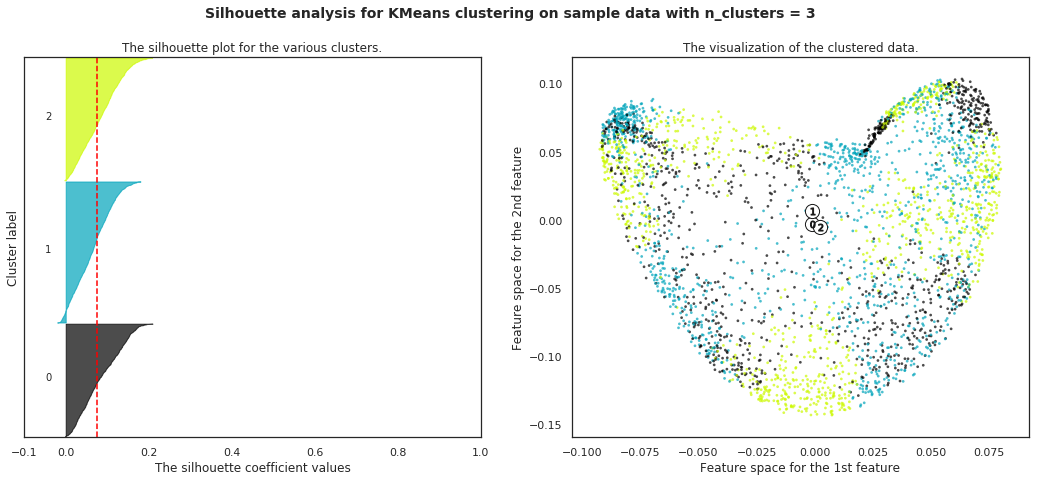

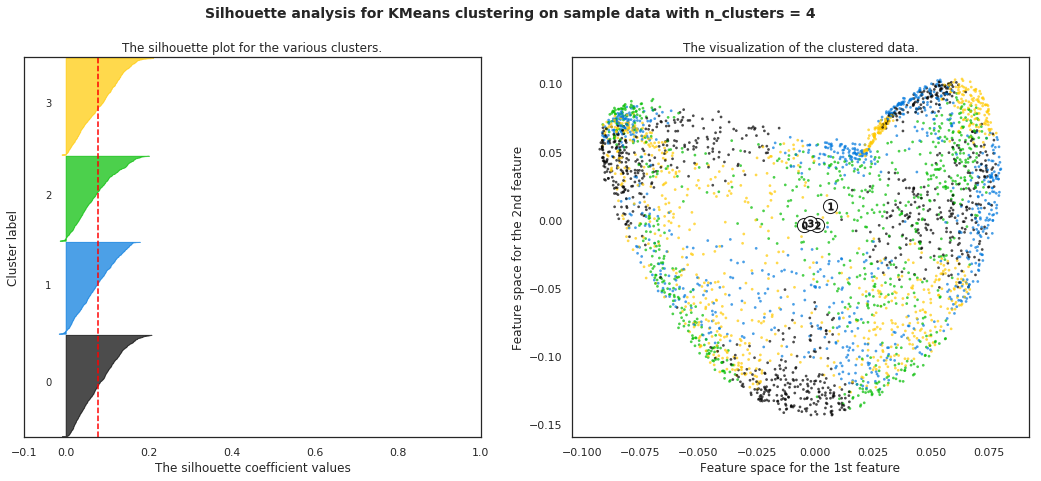

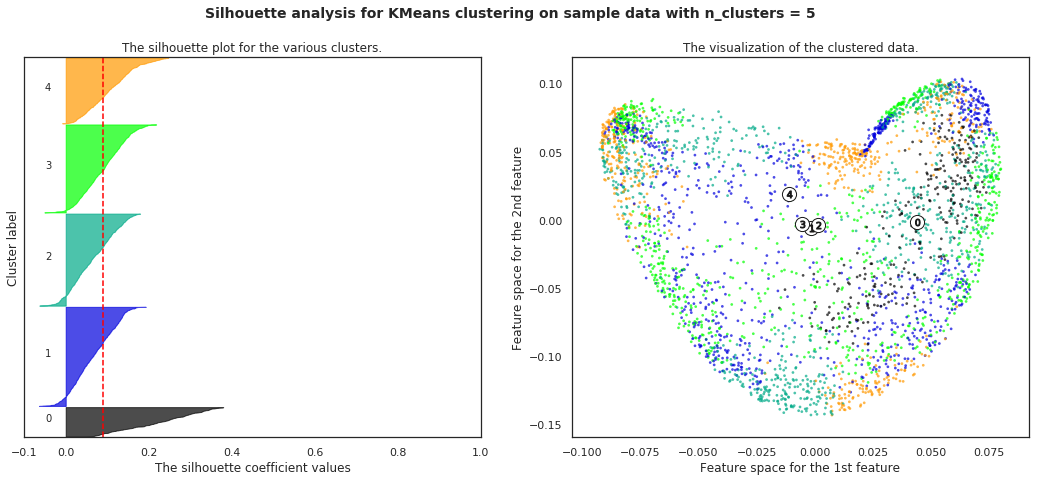

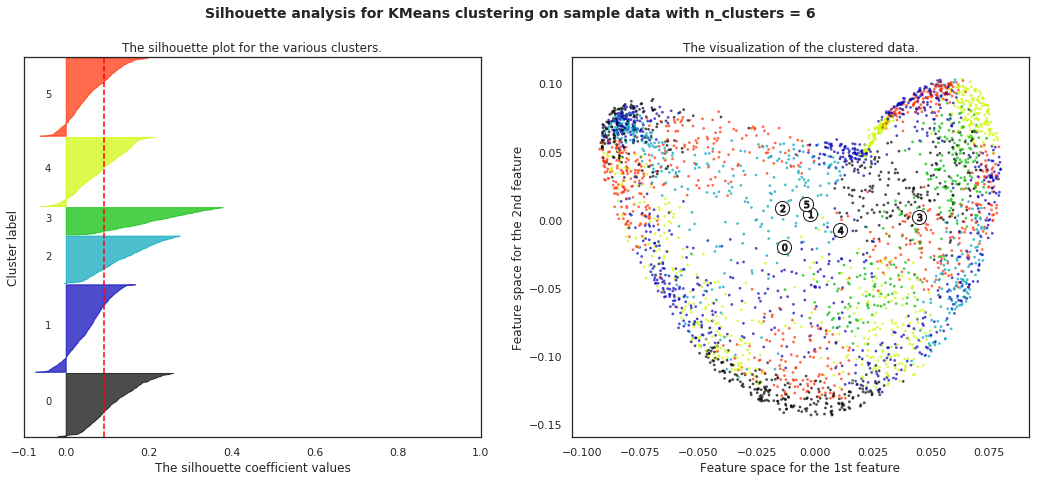

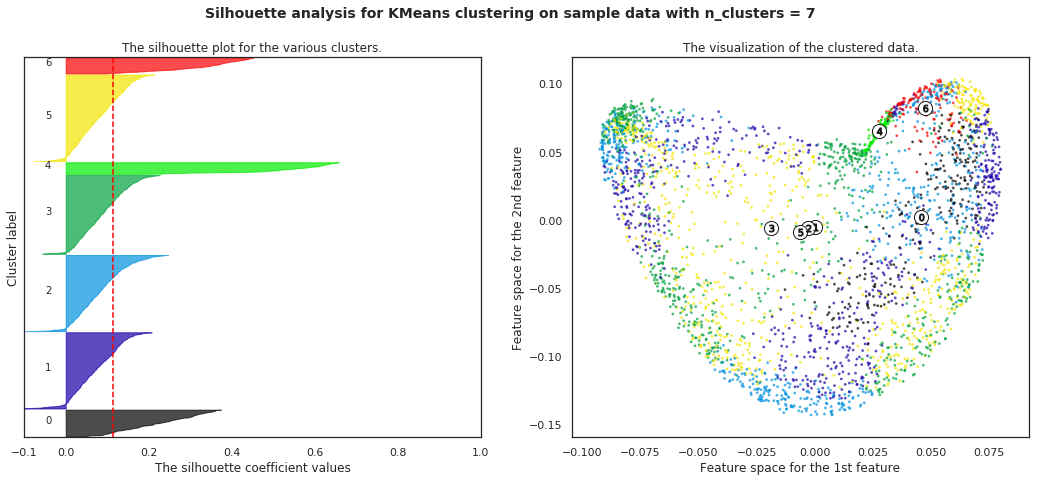

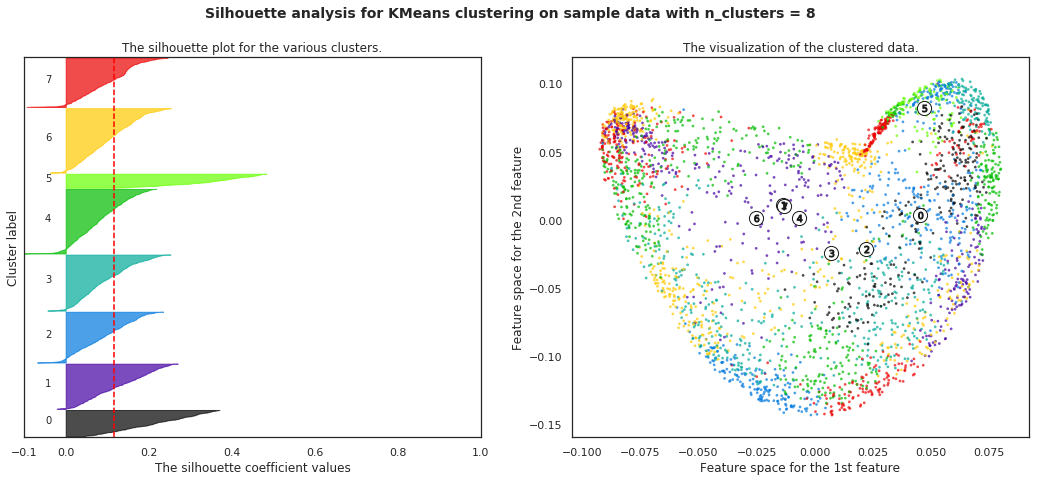

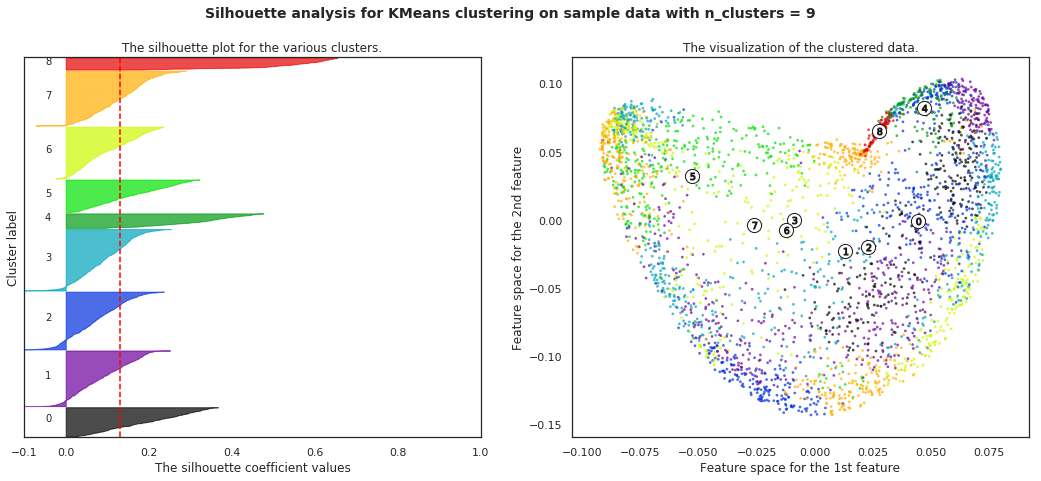

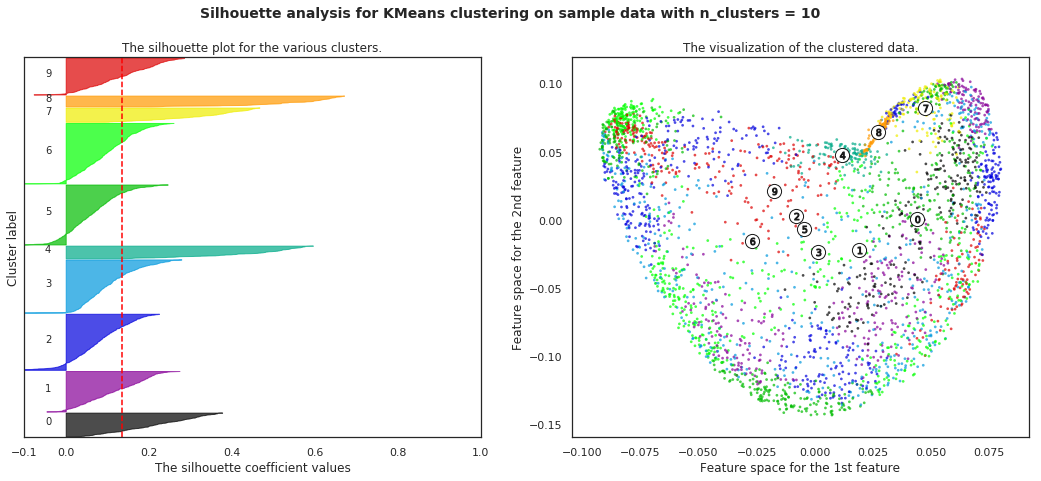

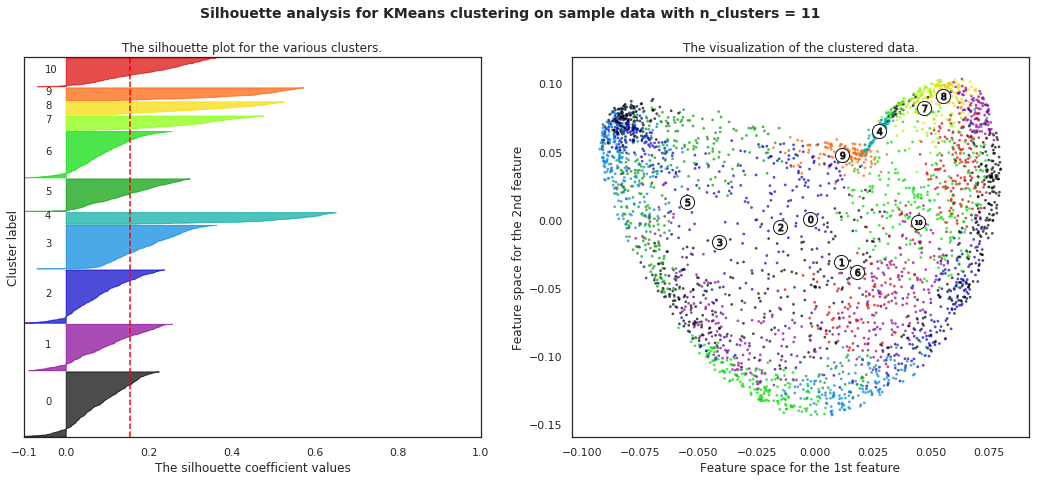

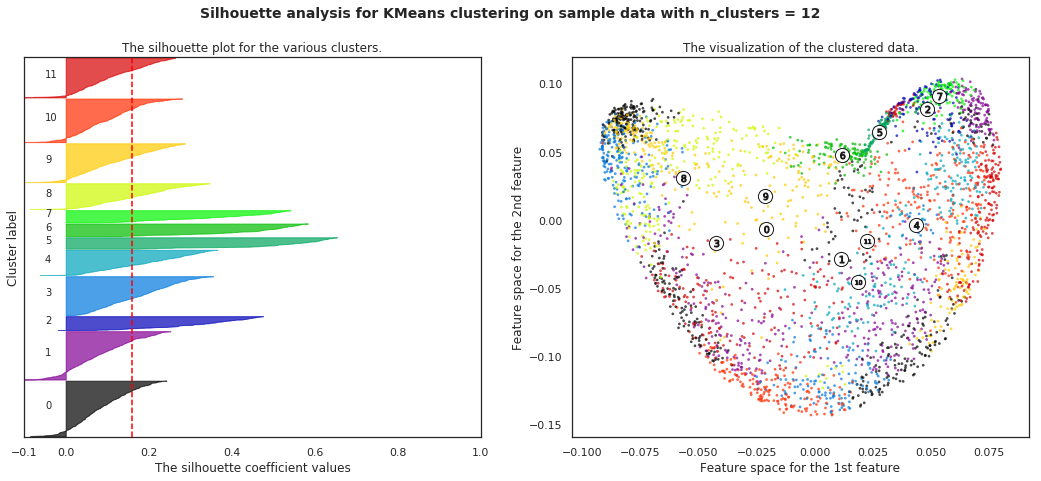

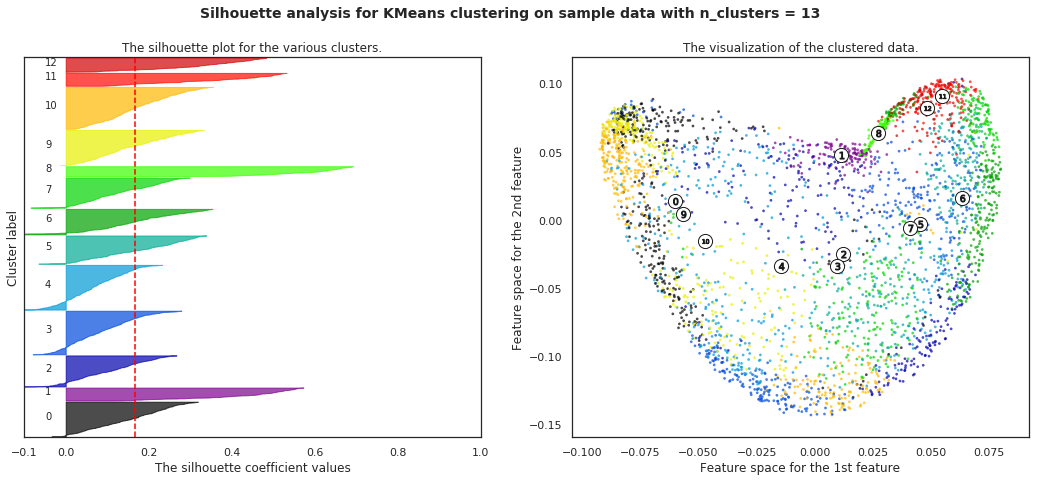

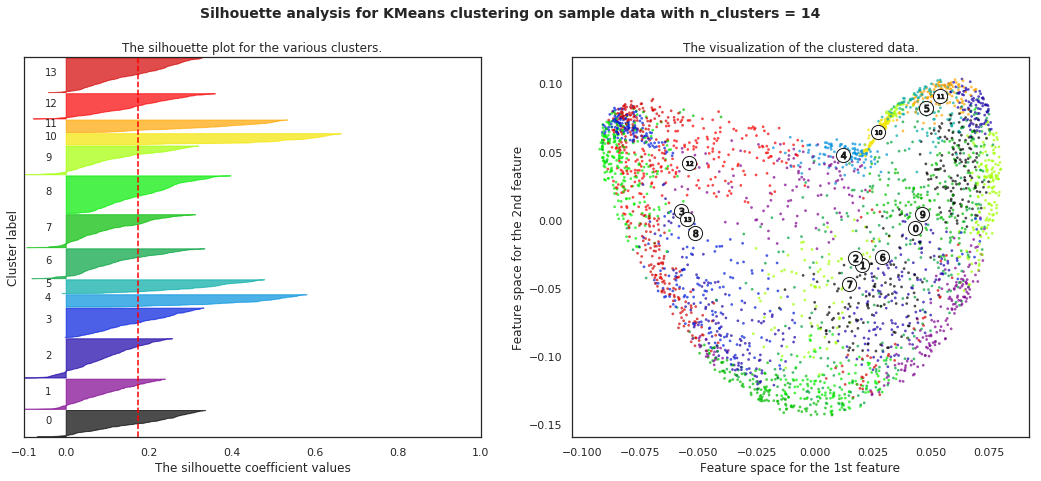

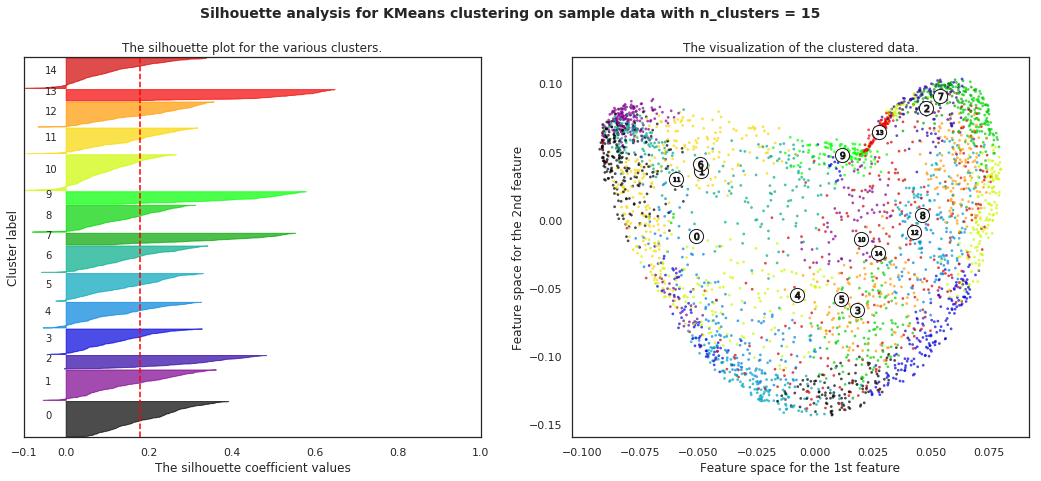

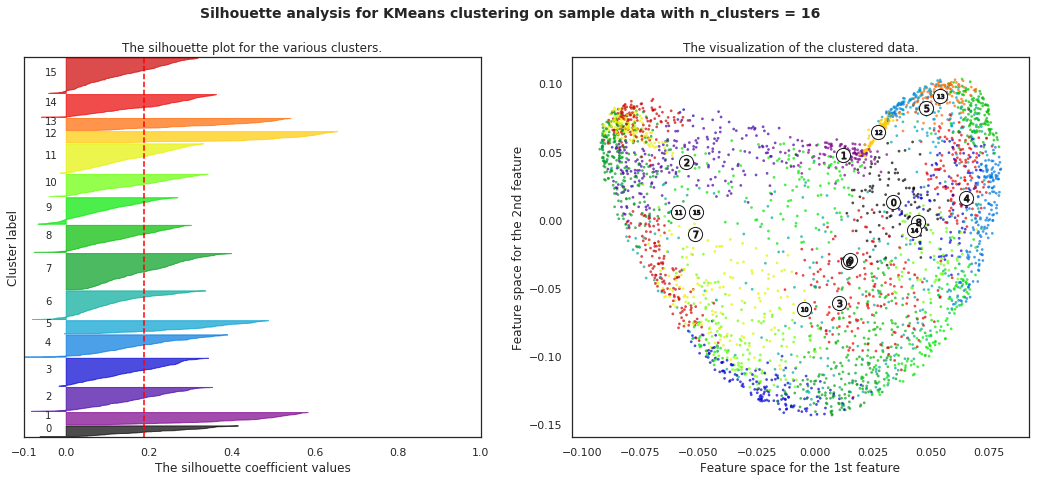

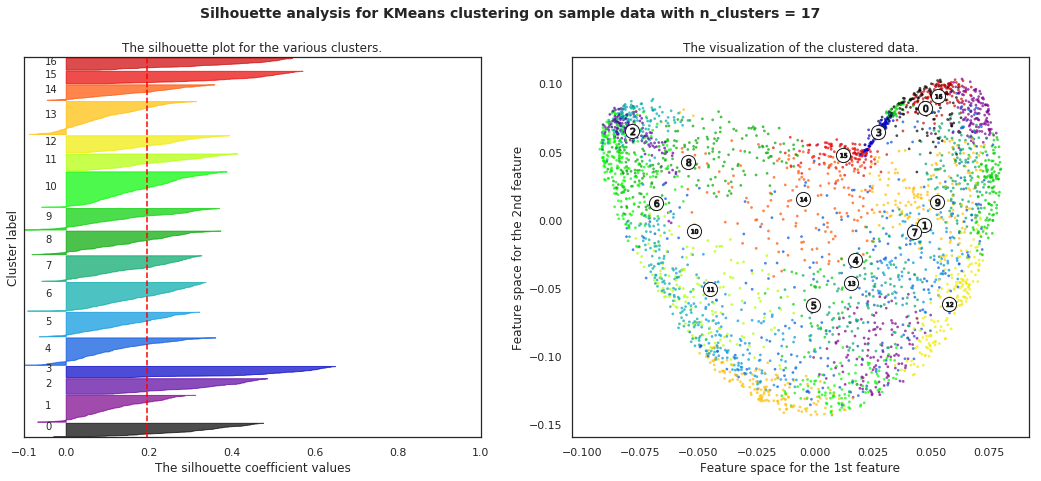

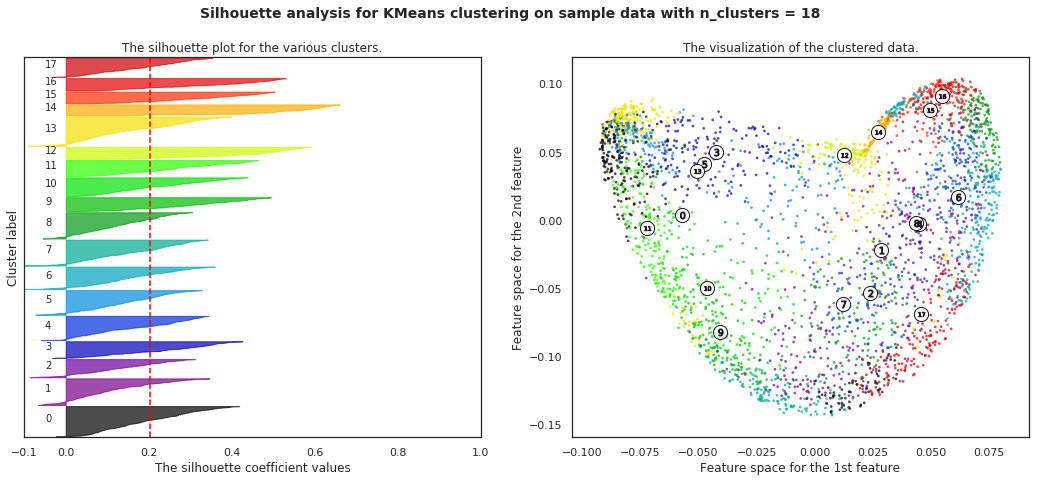

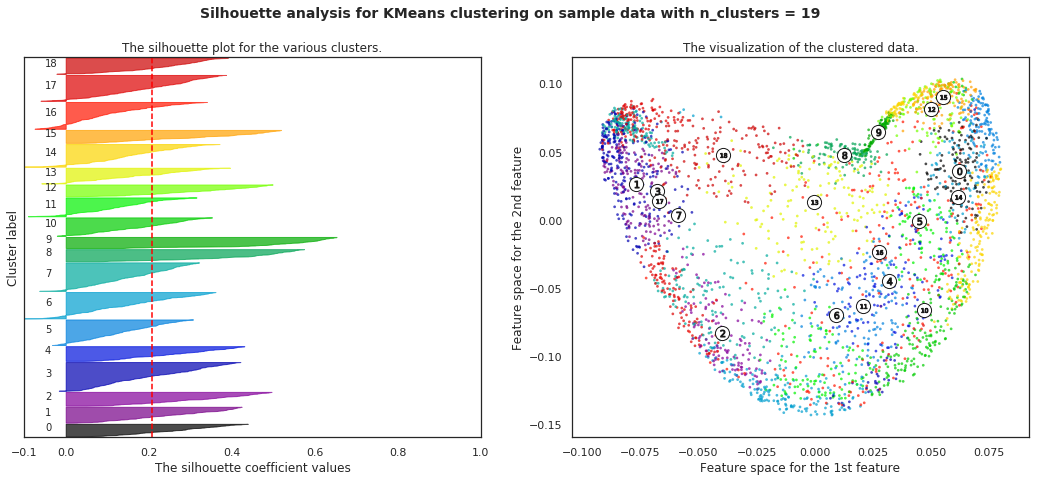

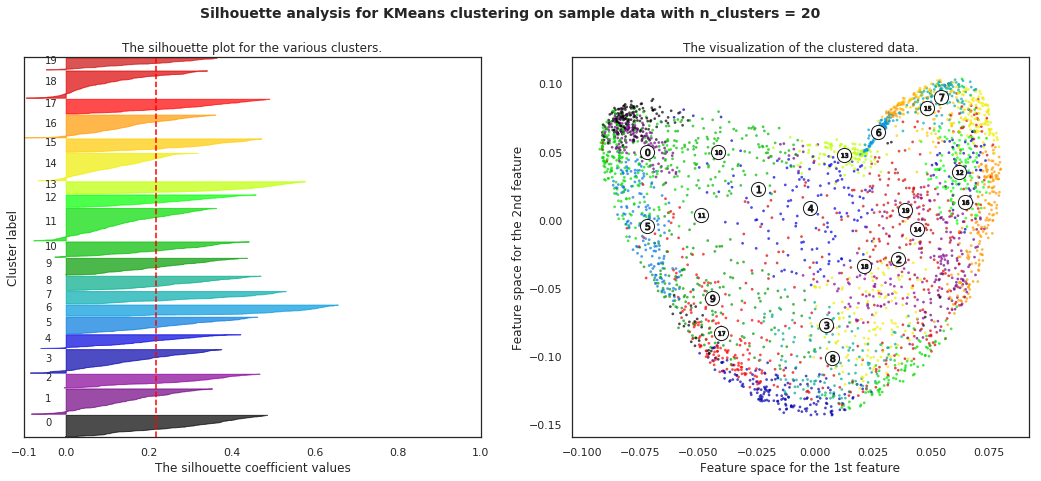

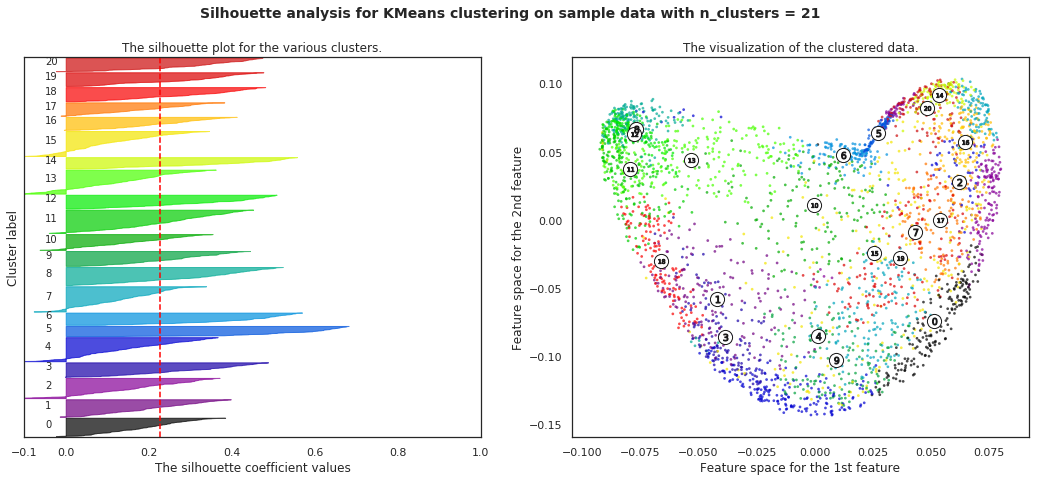

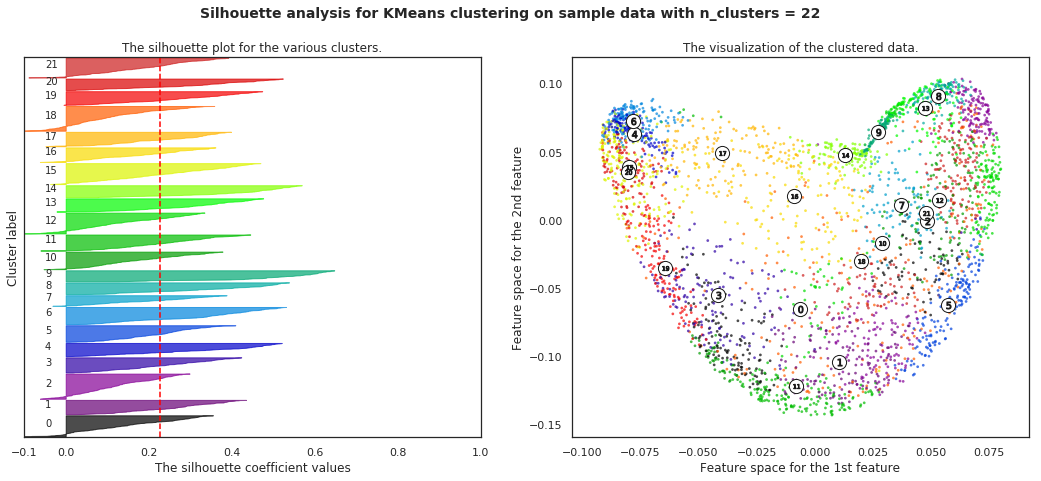

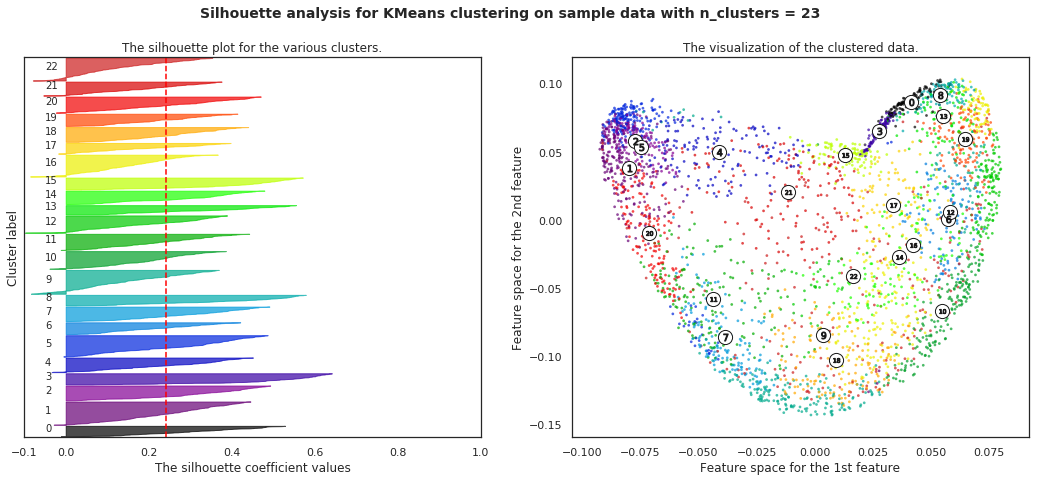

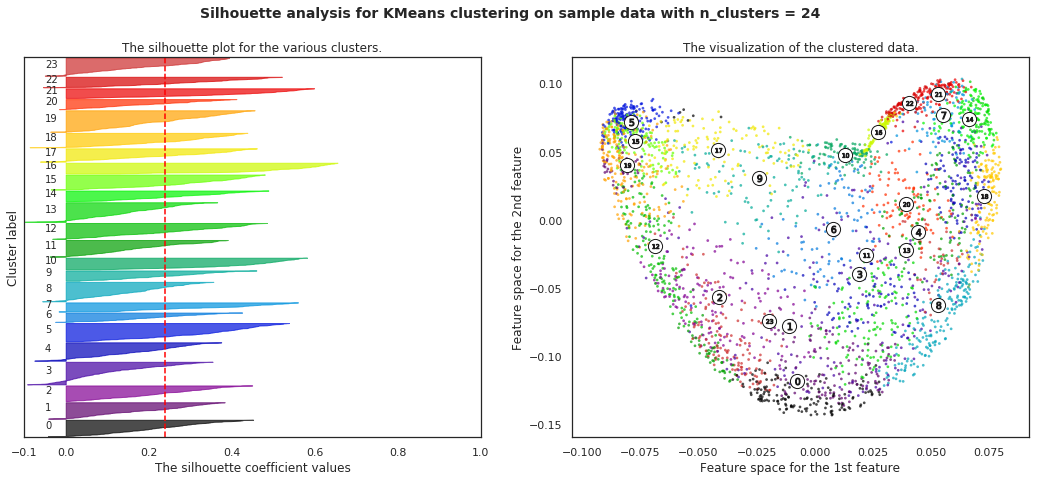

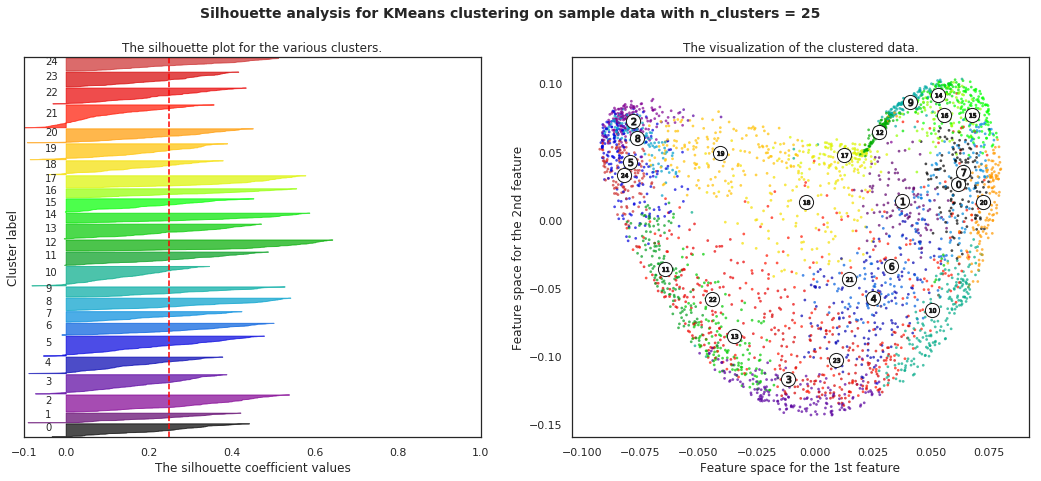

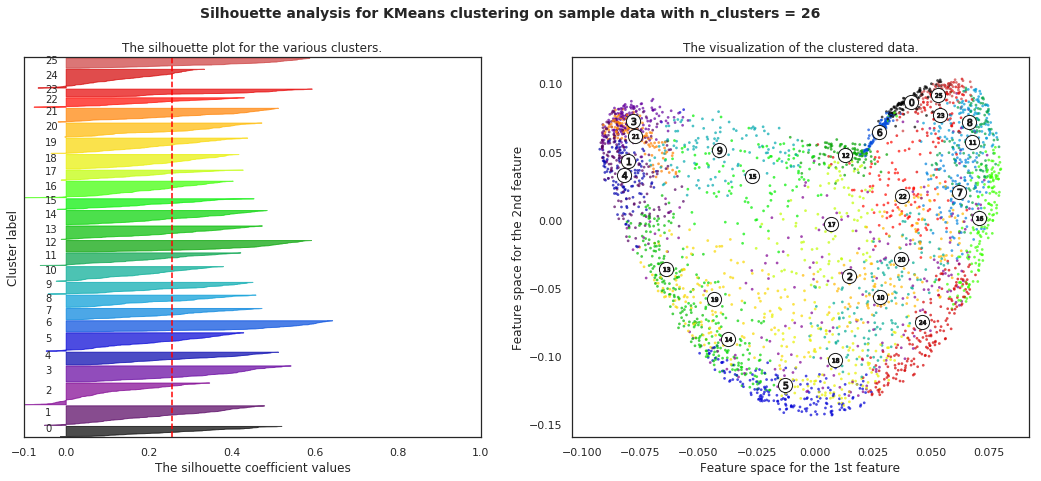

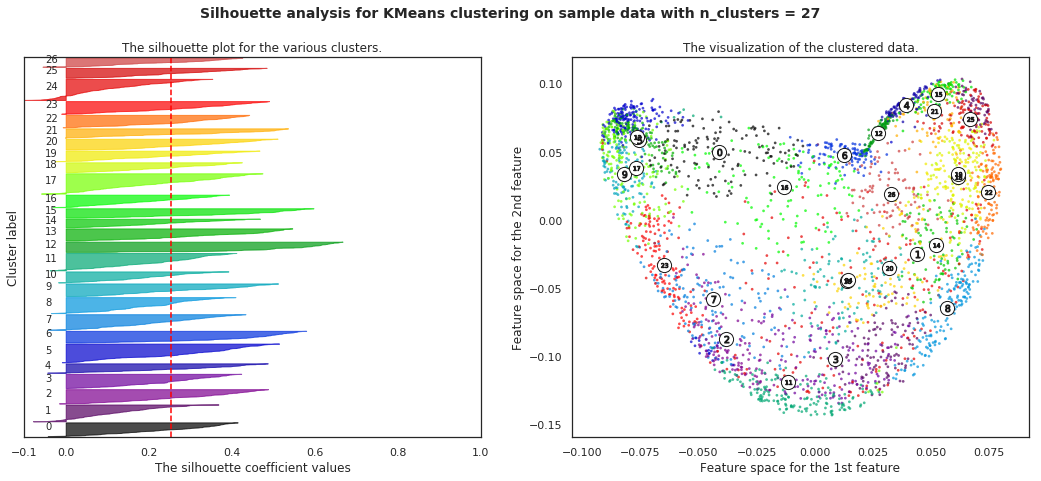

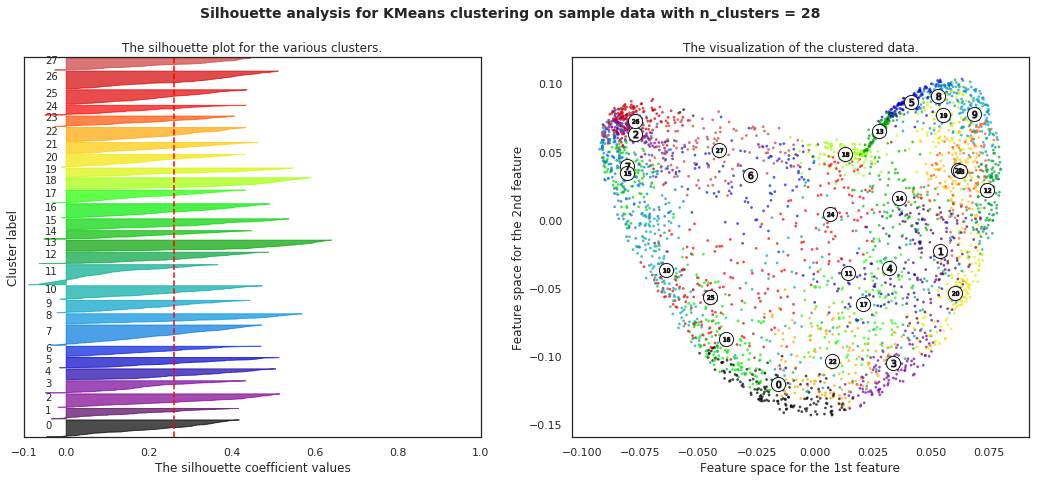

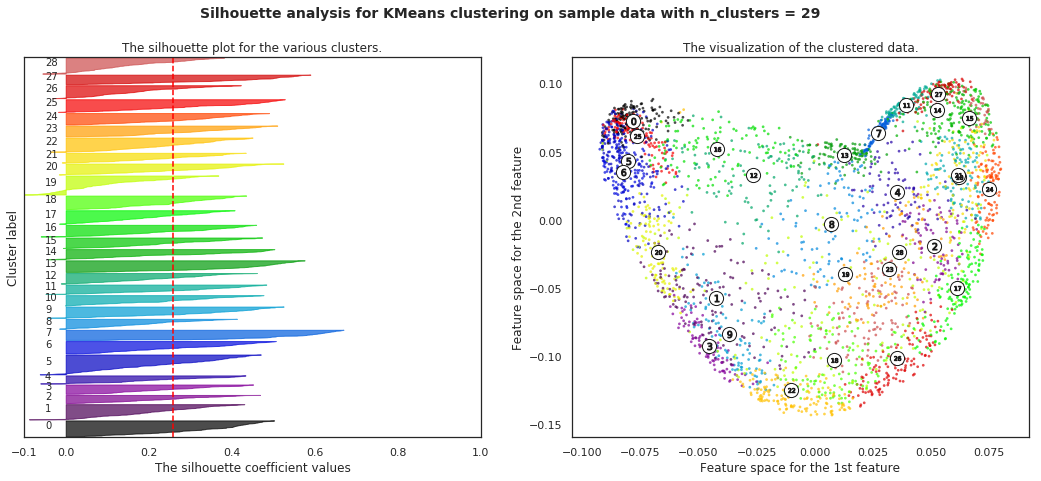

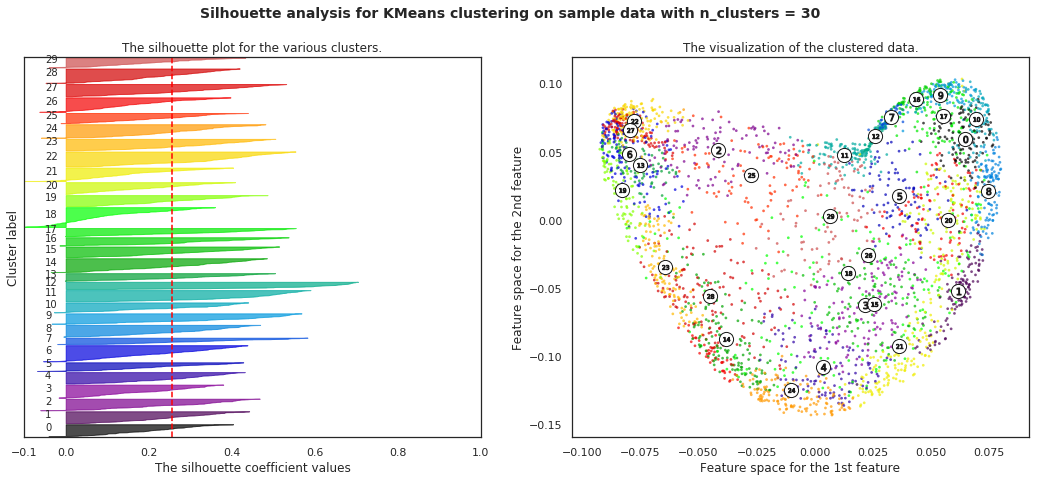

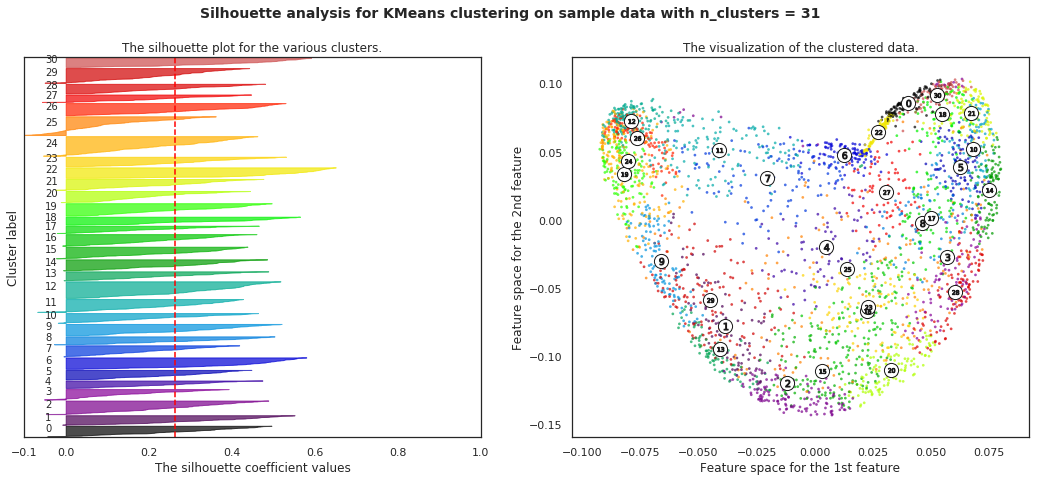

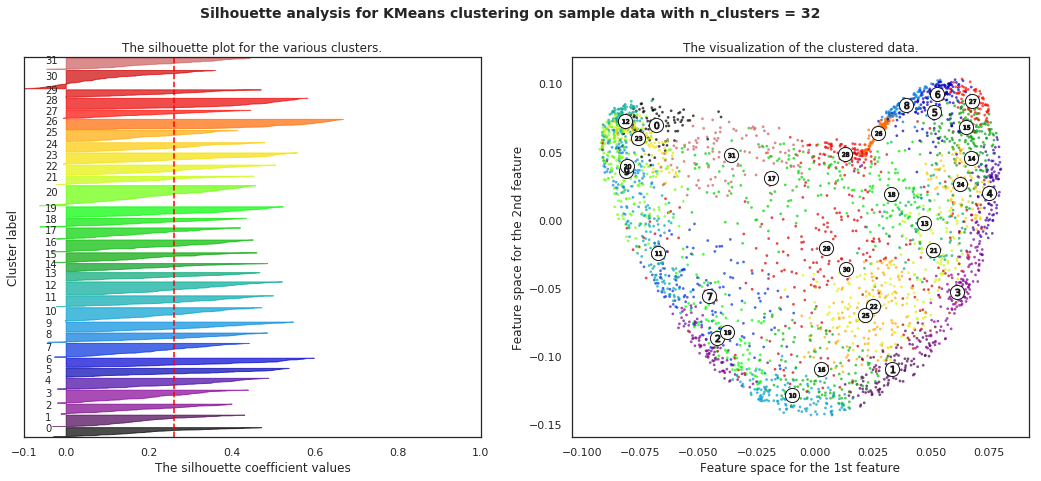

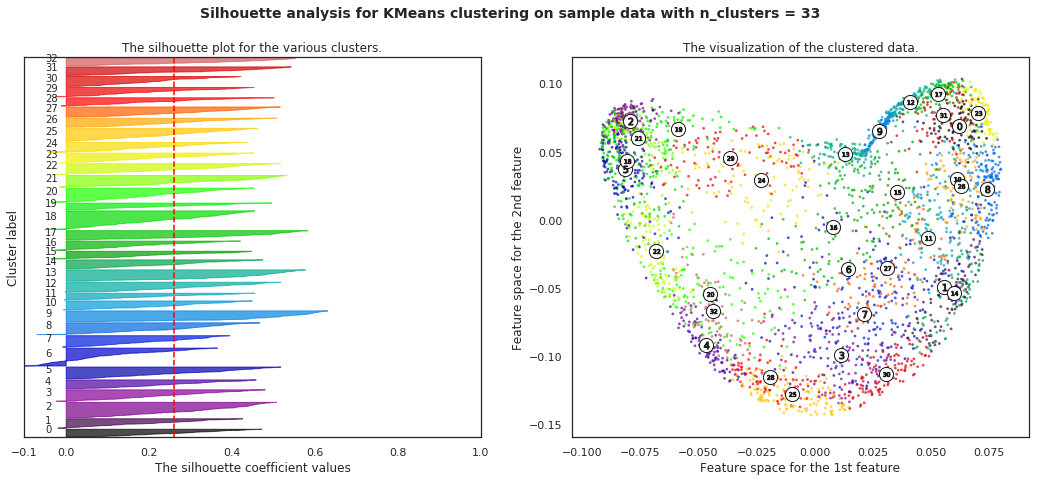

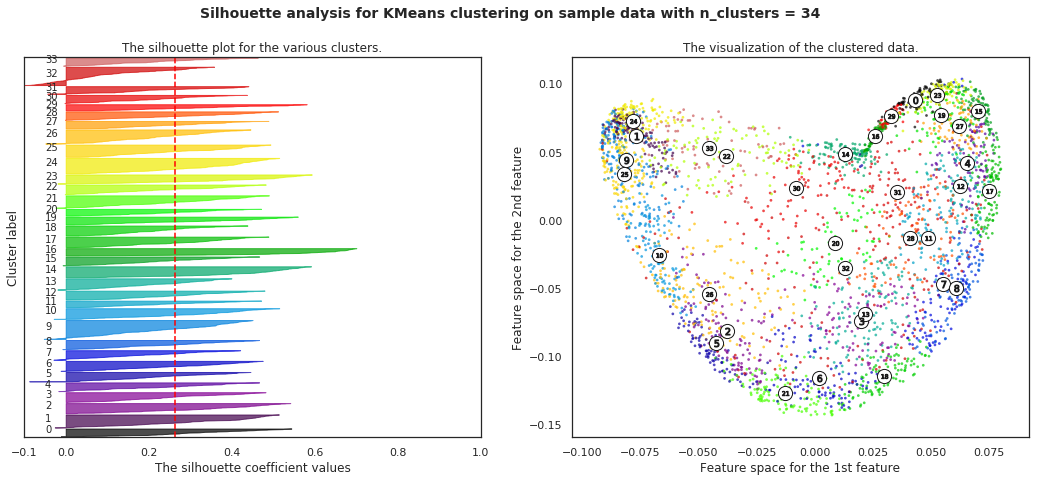

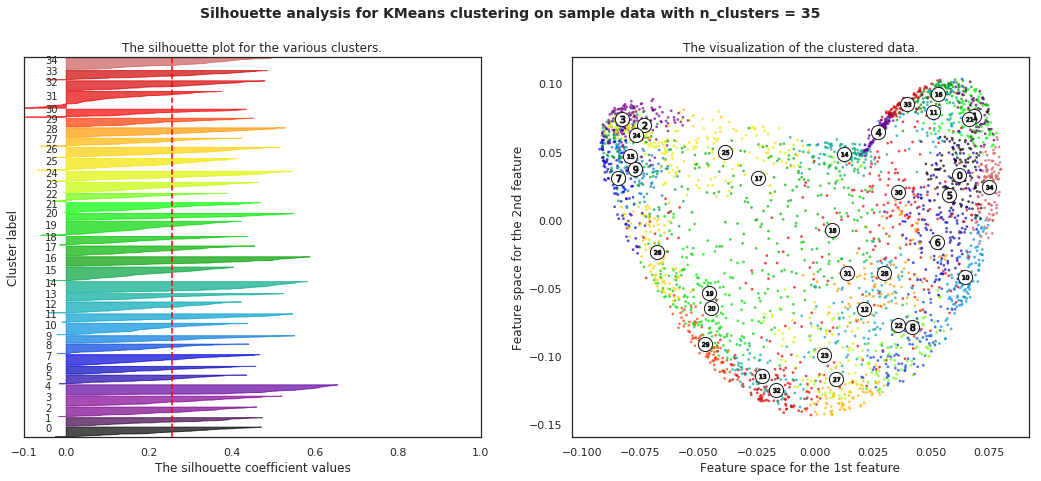

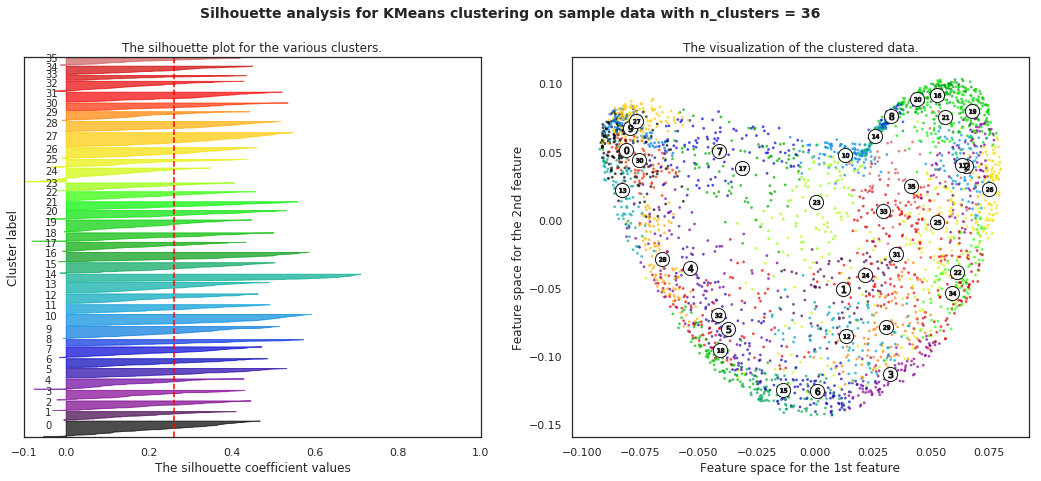

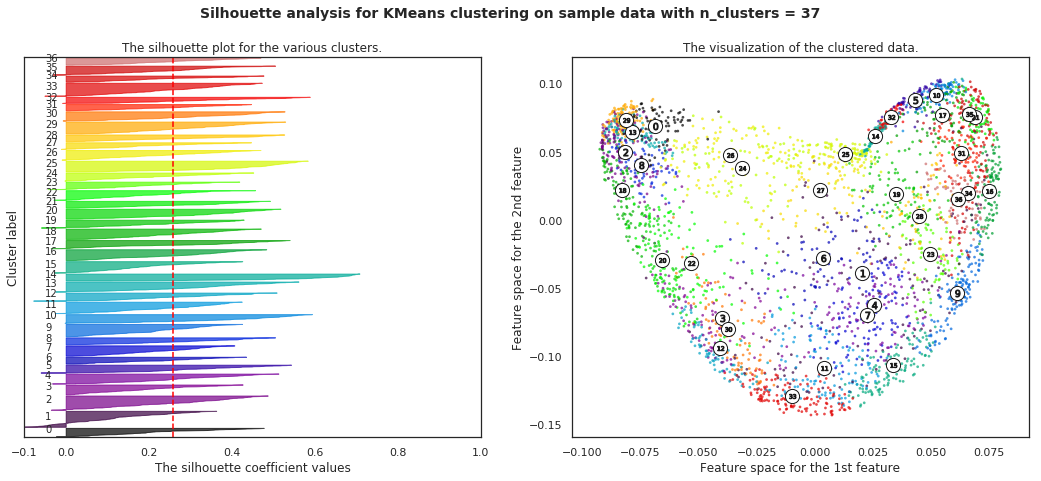

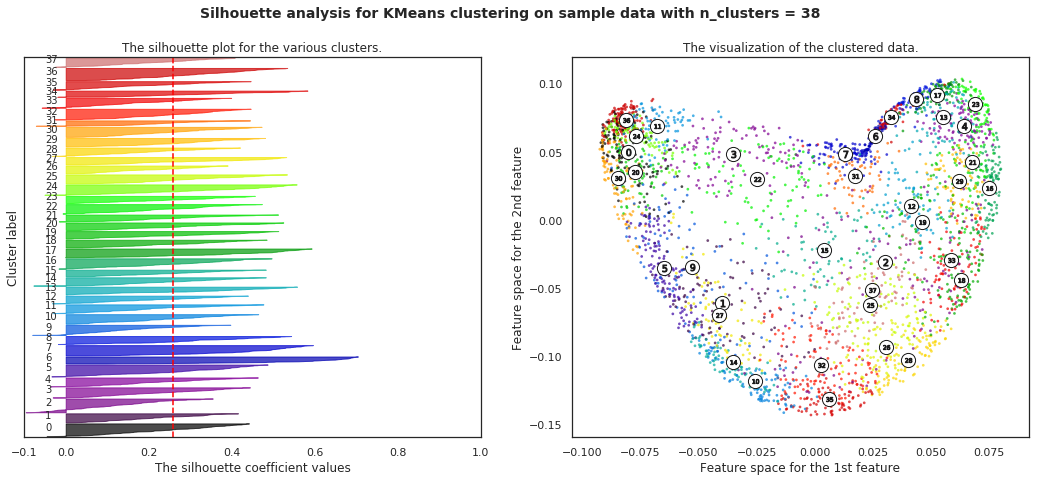

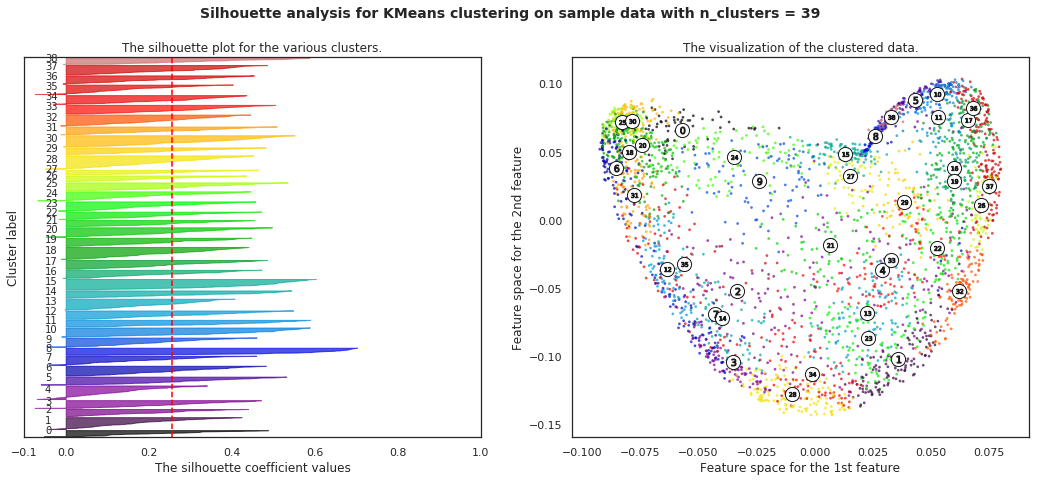

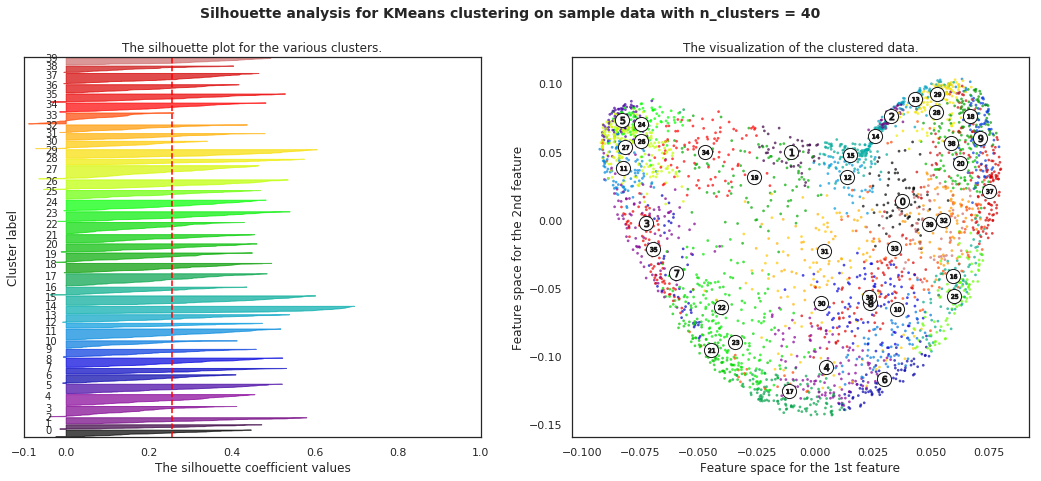

In [47]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

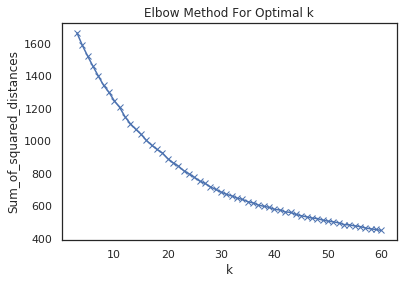

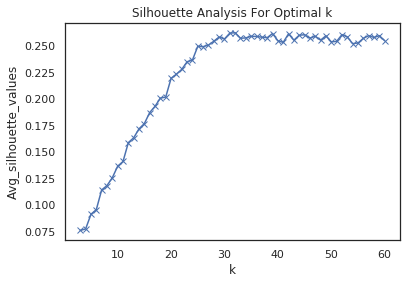

In [44]:
range_n_clusters = np.arange(3,61)
Sum_of_squared_distances = []
Avg_silhouette_values = []
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters)
    km = km.fit(X)
    cluster_labels = km.fit_predict(X)
    Sum_of_squared_distances.append(km.inertia_)
    Avg_silhouette_values.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.plot(range_n_clusters, Avg_silhouette_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Avg_silhouette_values')
plt.title('Silhouette Analysis For Optimal k')
plt.show()